# BasiCO

The software [BasiCO](https://basico.readthedocs.io/) provides a series of Python utilities for the simulation and analysis of biochemical networks. One of the advantages it offers over a completely custom approach, like the one we implemented with Numpy and Scipy, is the possibility reuse and share models. Here we will demonstrate how to use BasiCO to load some ready-made SMBL documents.

Since BasiCO is a Python library, we can rely on the `pip` package manager to automate its installation.

In [ ]:
!pip install copasi-basico

The following command will give us access to BasiCO within the current notebook.

In [2]:
from basico import *

## Brussellator

An SBML document describing the Brusselator has been published by the [BioPSy project](https://github.com/dreal/biology). You will find it at the following URL:

<https://github.com/dreal/biology/blob/master/models/CMSB2015/Brusselator/Brusselator.xml>

Use `curl` to download a local copy of the SBML file.

In [3]:
!curl -O 'https://raw.githubusercontent.com/dreal/biology/master/models/CMSB2015/Brusselator/Brusselator.xml'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6288  100  6288    0     0  15688      0 --:--:-- --:--:-- --:--:-- 15759


It's best to check the first few lines of the file to see if the download was successful.

In [4]:
!head Brusselator.xml

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by COPASI version 4.15 (Build 95) on 2015-12-16 15:58 with libSBML version 5.11.1. -->
<sbml xmlns="http://www.sbml.org/sbml/level2/version4" level="2" version="4">
  <model metaid="COPASI0" id="The_Brusselator" name="The Brusselator">
    <notes>
      <html xmlns="http://www.w3.org/1999/xhtml">
        <head>
          <title xmlns="http://www.w3.org/1999/xhtml"/>
          <meta name="qrichtext" content="1"/>
        </head>


Everything seems in order. Notice in particular the "sbml" tag near the top.

Let's read the entire document with BasiCO.

In [5]:
model = load_model("Brusselator.xml")
model

<CDataModel "Root">

The default representation of the model certainly lacks details. Luckily, we can get more information with the appropriate accessor functions. For instance, we can ask for all the *species* present in the model.

In [6]:
get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
X,compartment,reactions,mmol/ml,2.999996,1.806640e+21,,,2.999996,1.806640e+21,7.678130,4.623878e+21,Metabolite_0,X
Y,compartment,reactions,mmol/ml,2.999996,1.806640e+21,,,2.999996,1.806640e+21,-10.186806,-6.134638e+21,Metabolite_1,Y
A,compartment,fixed,mmol/ml,0.500000,3.011070e+20,,,0.500000,3.011070e+20,0.000000,0.000000e+00,Metabolite_2,A
B,compartment,fixed,mmol/ml,2.999996,1.806640e+21,,,2.999996,1.806640e+21,0.000000,0.000000e+00,Metabolite_3,B
D,compartment,fixed,mmol/ml,0.000000,0.000000e+00,,,0.000000,0.000000e+00,0.000000,0.000000e+00,Metabolite_4,D
E,compartment,fixed,mmol/ml,0.000000,0.000000e+00,,,0.000000,0.000000e+00,0.000000,0.000000e+00,Metabolite_5,E


Now it's the turn of *reactions*.

In [7]:
get_reactions()

,scheme,flux,particle_flux,function,key,sbml_id,mapping
name,,,,,,,
R1,A -> X,0.561490,3.381371e+20,Mass action (irreversible),Reaction_0,R1,"{'k1': 1.12298, 'substrate': 'A'}"
R2,2 * X + Y -> 3 * X,17.094548,1.029458e+22,Mass action (irreversible),Reaction_1,R2,"{'k1': 0.633134, 'substrate': ['X', 'X', 'Y']}"
R3,X + B -> Y + D,6.907742,4.159940e+21,Mass action (irreversible),Reaction_2,R3,"{'k1': 0.767529, 'substrate': ['X', 'B']}"
R4,X -> E,3.070166,1.848897e+21,Mass action (irreversible),Reaction_3,R4,"{'k1': 1.02339, 'substrate': 'X'}"


The parameters listed on the right-hand side of the table are different from those we used previously, but the structure of the equations is clearly the same.

At this point, obtaining a new simulation for this setup is really easy. BasiCO automates the entire procedure by means of a function called `run_time_course()`.

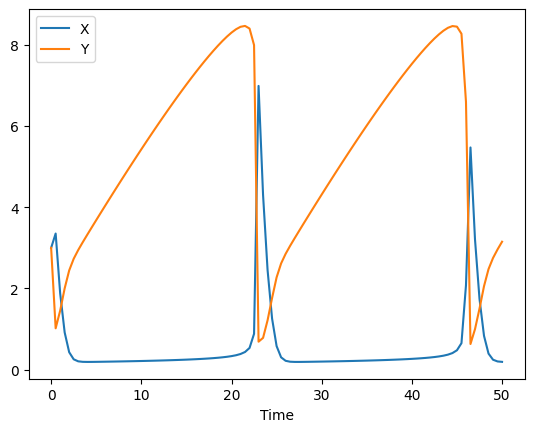

In [8]:
result = run_time_course(duration=50)
result.plot();

The concentrations listed above for $A$ and $B$ cause the system to oscillate periodically. If you remember, other values lead the Brusselator to an equilibrium.

We can change the concentrations to experiment with other possibilities. For instance:

In [9]:
set_species("A", initial_concentration=1)
set_species("B", initial_concentration=1.5)

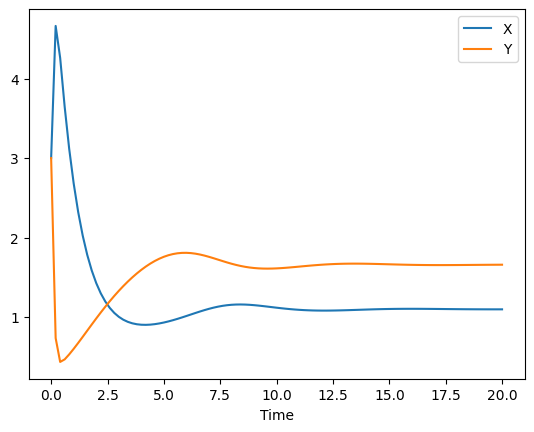

In [10]:
result = run_time_course(duration=20)
result.plot();

## More Models

In this section we will investigate an artificial circuit that was originally described in [A synthetic gene–metabolic oscillator](https://www.nature.com/articles/nature03508).

*Figure 1* of the paper summarizes nicely the architecture of the system.

[![Circuit Architecture](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature03508/MediaObjects/41586_2005_Article_BFnature03508_Fig1_HTML.jpg?as=webp)](https://www.nature.com/articles/nature03508/figures/1)

This system uses several reactions, and it would take some time to translate all of them into a computer model. We have an alternative, though.

The [BioModels](http://biomodels.net/) website has emerged as a popular repository for all sorts of mathematical models of biological and biomedical systems. Click on the link above and explore the website for a few minutes.

**Question**: Can you find a webpage for the model described in the paper? What is its identifier?

BasiCO integrates natively with BioModels. It is possible to retrieve a model using its ID only. Try with the following code:

In [11]:
import basico.biomodels as biomodels

In [12]:
info = biomodels.get_model_info(67)
print(info["name"])

Fung2005_Metabolic_Oscillator


The variable `info` above is not yet holding the full model. For that, we are going to resort to the function `load_biomodel()`.

In [13]:
model = load_biomodel(67)

In [14]:
get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
Acetyl-CoA,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.5,3.011070e+23,Metabolite_6,AcCoA
Acetyl phosphate,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.000000e+00,Metabolite_7,AcP
Acetate,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.000000e+00,Metabolite_8,OAc
protonated acetate,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.000000e+00,Metabolite_9,HOAc
lac repressor,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.000000e+00,Metabolite_10,LacI
Acetyl-CoA synthase,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.000000e+00,Metabolite_11,Acs
Phosphate acetyl transferase,Intracellular,reactions,mol/l,0.0,0.0,,,0.0,0.0,2.0,1.204428e+24,Metabolite_12,Pta
acetate export,Intracellular,fixed,mol/l,0.0,0.0,,,0.0,0.0,0.0,0.000000e+00,Metabolite_13,HOAc_E


In [15]:
get_reactions()

,scheme,flux,particle_flux,function,key,sbml_id,mapping
name,,,,,,,
Glycolytic flux,-> Acetyl-CoA,0.5,3.011070e+23,Constant flux (irreversible),Reaction_4,V_gly,{'v': 'S0'}
Flux to TCA cycle,Acetyl-CoA ->,0.0,0.000000e+00,Mass action (irreversible),Reaction_5,V_TCA,"{'k1': 'kTCA', 'substrate': 'Acetyl-CoA'}"
Intercellular transport of Acetate,"""protonated acetate"" = ""acetate export""",0.0,0.000000e+00,Function for Intercellular transport of Acetate,Reaction_6,V_out,"{'HOAc': '""protonated acetate""', 'HOAc_E': '""a..."
Phosphate acetyl transferase flux,"Acetyl-CoA -> ""Acetyl phosphate""; ""Phosphate ...",0.0,0.000000e+00,Function for Phosphate acetyl transferase flux,Reaction_7,V_Pta,"{'AcCoA': 'Acetyl-CoA', 'KM1': 'KM1', 'Pta': '..."
Acetate kinase,"""Acetyl phosphate"" = Acetate",0.0,0.000000e+00,Mass action (reversible),Reaction_8,V_Ack,"{'k1': 'kAck_f', 'substrate': '""Acetyl phospha..."
Acetyl-CoA synthase flux,"Acetate -> Acetyl-CoA; ""Acetyl-CoA synthase""",0.0,0.000000e+00,Function for Acetyl-CoA synthase flux,Reaction_9,V_Acs,"{'Acs': '""Acetyl-CoA synthase""', 'KM2': 'KM2',..."
Acid-base equilibrium,"Acetate = ""protonated acetate""",0.0,0.000000e+00,Function for Acid-base equilibrium,Reaction_10,V_Ace,"{'C': 'C', 'H': 'H', 'HOAc': '""protonated acet..."
LacI synthesis,"-> ""lac repressor""; ""Acetyl phosphate""",0.0,0.000000e+00,Function for LacI synthesis,Reaction_11,R_LacI,"{'AcP': '""Acetyl phosphate""', 'Kg1': 'Kg1', 'a..."
Acetyl-CoA synthase synthesis,"-> ""Acetyl-CoA synthase""; ""Acetyl phosphate""",0.0,0.000000e+00,Function for Acetyl-CoA synthase synthesis,Reaction_12,R_Acs,"{'AcP': '""Acetyl phosphate""', 'Kg2': 'Kg2', 'a..."


Now go back to the paper and try to compare the output of the simulation with the description that appears there.

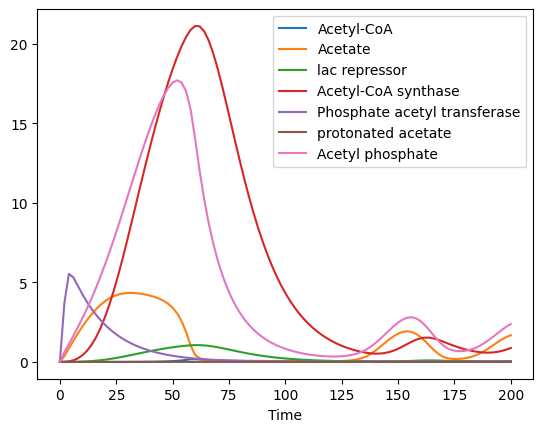

In [16]:
result = run_time_course(duration=200)
result.plot();